# Customer Churn Analytics at Telecommunication Service

## --- Define Problems ---

Acquiring new customers is  more expensive than keeping the existing ones. Thus, churn analytics comes in handy. It is a methodology  which measures the likelihood of  customers stop using company's products or services.   According to a recent report, about 97% of customers churn silently without leaving any feedback.  However, many companies still underestitmate the importance of maintating strong relationship with customers. Instead, more and more money is spent on marketing to attract new ones. Churn analytics has brought  companies benefits including:
- Prevent loss of revenue
- Reduce markeitng and sales cost
- Improve customer service quality
- Increase up sales and cross sales

The main objectives of this  project are:  
- To understand what factors contributed most to customer turnover.
To perform clustering to find any meaningful patterns of customer traits.
- To create a model that predicts the likelihood if a customer will leave the company or not.
- To create or improve different retention strategies on targeted customers.

## --- Exploratory Data Analysis ---

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


### Load Dataset

In [2]:
df = pd.read_csv('/Users/annieha/Desktop/Data/data/telco_customer_churn.csv')

In [3]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
#changing column names to lower case
new_name = df.columns.str.lower().values 
df.columns = new_name

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account_length  3333 non-null   int64  
 1   vmail_message   3333 non-null   int64  
 2   day_mins        3333 non-null   float64
 3   eve_mins        3333 non-null   float64
 4   night_mins      3333 non-null   float64
 5   intl_mins       3333 non-null   float64
 6   custserv_calls  3333 non-null   int64  
 7   churn           3333 non-null   object 
 8   intl_plan       3333 non-null   object 
 9   vmail_plan      3333 non-null   object 
 10  day_calls       3333 non-null   int64  
 11  day_charge      3333 non-null   float64
 12  eve_calls       3333 non-null   int64  
 13  eve_charge      3333 non-null   float64
 14  night_calls     3333 non-null   int64  
 15  night_charge    3333 non-null   float64
 16  intl_calls      3333 non-null   int64  
 17  intl_charge     3333 non-null   f

In [6]:
#checking for missing values
df.isnull().sum()

account_length    0
vmail_message     0
day_mins          0
eve_mins          0
night_mins        0
intl_mins         0
custserv_calls    0
churn             0
intl_plan         0
vmail_plan        0
day_calls         0
day_charge        0
eve_calls         0
eve_charge        0
night_calls       0
night_charge      0
intl_calls        0
intl_charge       0
state             0
area_code         0
phone             0
dtype: int64

## --- Exploratory Data Analysis ---

### Calculating Churn Rate

In [7]:
df['churn'].value_counts(1)

no     0.855086
yes    0.144914
Name: churn, dtype: float64

### Statistical Overview of Customers

In [8]:
df.describe()

,account_length,vmail_message,day_mins,eve_mins,night_mins,intl_mins,custserv_calls,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,intl_calls,intl_charge,area_code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [9]:
df.describe(include='object')

,churn,intl_plan,vmail_plan,state,phone
count,3333,3333,3333,3333,3333
unique,2,2,2,51,3333
top,no,no,no,WV,364-5126
freq,2850,3010,2411,106,1


In [10]:
df.head()

,account_length,vmail_message,day_mins,eve_mins,night_mins,intl_mins,custserv_calls,churn,intl_plan,vmail_plan,...,day_charge,eve_calls,eve_charge,night_calls,night_charge,intl_calls,intl_charge,state,area_code,phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


### Correlation

In [11]:
#label encoding columns 
cols = ['churn', 'intl_plan', 'vmail_plan']
for col in cols:
    lb_encoder = LabelEncoder()
    df[col] = lb_encoder.fit_transform(df[col])

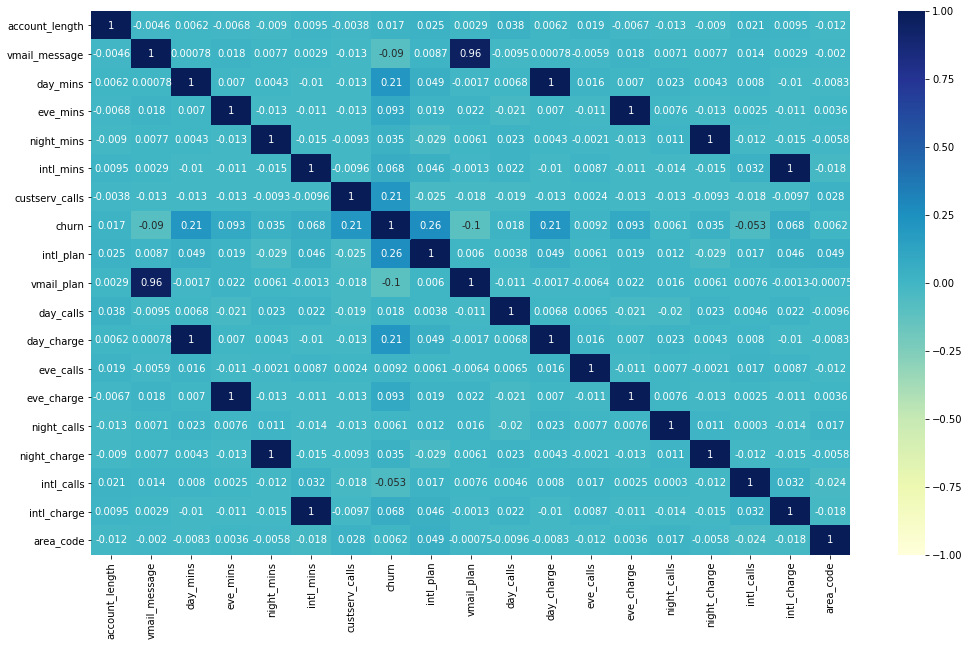

In [15]:
fig = plt.figure(figsize= (17,10))
sns.heatmap(df.corr(), annot= True, cmap= "YlGnBu", vmin = -1, vmax = 1 )

### Churners Vs Non-churners

In [16]:
df.groupby('churn').mean()

,account_length,vmail_message,day_mins,eve_mins,night_mins,intl_mins,custserv_calls,intl_plan,vmail_plan,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,intl_calls,intl_charge,area_code
churn,,,,,,,,,,,,,,,,,,
0,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,0.065263,0.295439,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
1,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,0.283644,0.165631,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


There are differnces in the average day_mins, eve_mins, custserv_calls, day_charge between churner and nonchurners. Let's have a further look at these variables 

#### Plotting Churns by State

In [17]:
churn_by_state = df.groupby('state')['churn'].value_counts()
churn_by_state.index = churn_by_state.index.set_names(['State', 'Churn'])
churn_by_state = churn_by_state.reset_index()
churn_by_state.rename({'churn': 'Frequency'}, axis = 1, inplace=True)

Text(0.5, 1.0, 'Churn by State')

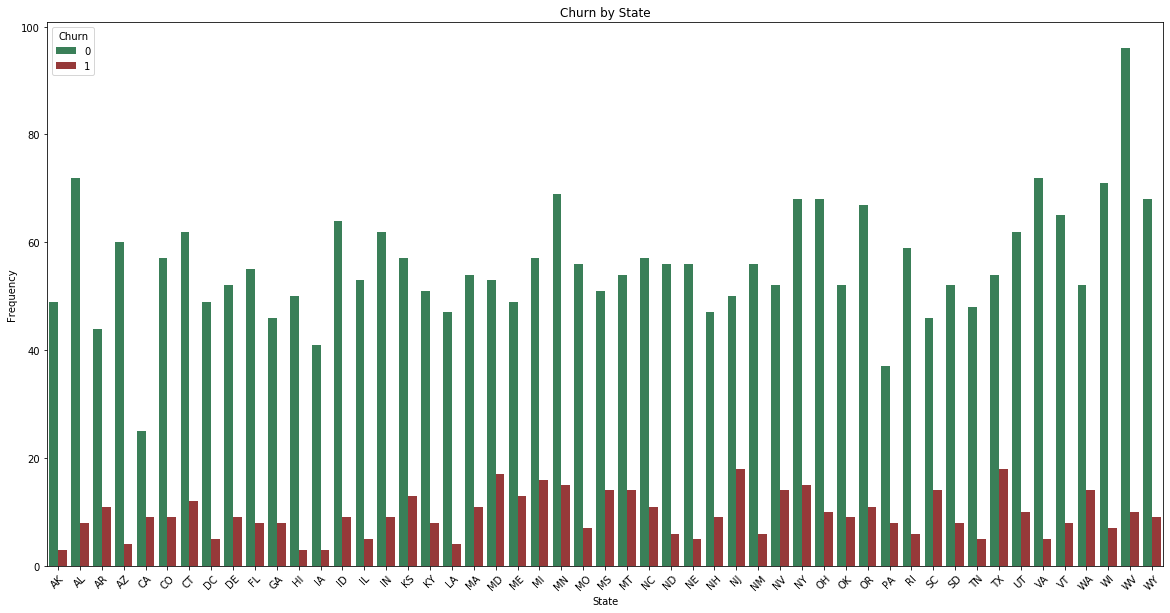

In [18]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x = 'State', y = 'Frequency', hue = 'Churn', data = churn_by_state, palette=['seagreen', 'brown'])
plt.xticks(rotation = 45)
plt.title("Churn by State")

#### Top 5 States Has The Most Churners

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
#Top 5 State has the most churner
top_5 = df.loc[df['churn'] == 1, 'state'].value_counts().sort_values(ascending = False).head()
print('Top 5 States has the most churners:')
print(top_5)

Top 5 States has the most churners:
NJ    18
TX    18
MD    17
MI    16
MN    15
Name: state, dtype: int64


In [32]:
#Let's further investigate if there is any patters behind churner at these top 5 states compare to the whole country
top_5 = ['NJ', 'TX', 'MD', 'MI', 'MN']
top_5_df = df[df['state'].isin(top_5)]
top_5_df.head()
#look at the average values for top_5 state
top_5_df.groupby(['churn']).mean()

,account_length,vmail_message,day_mins,eve_mins,night_mins,intl_mins,custserv_calls,intl_plan,vmail_plan,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,intl_calls,intl_charge,area_code
churn,,,,,,,,,,,,,,,,,,
0,98.604240,8.961131,178.589753,196.732155,199.739929,10.474912,1.452297,0.053004,0.296820,99.678445,30.360707,101.346290,16.722297,101.519435,8.987915,4.639576,2.828728,437.038869
1,107.083333,5.178571,217.413095,212.597619,204.151190,11.236905,2.226190,0.285714,0.166667,100.785714,36.960952,102.059524,18.071310,96.773810,9.187143,4.107143,3.034405,441.273810


in top 5 state the account_length is significant different between 2 groups. The rest of features share similar trend with the rest of the country. 

#### Distribution of Account Length

In [54]:
def kdeplot_features(df, col, c1, c2):
    fig, ax = plt.subplots(figsize = (12,7))
    ax.grid(False)
    sns.kdeplot(df.loc[df['churn'] == 1, col], color = c1, label = 'Churn', shade=True, bw='scott')
    sns.kdeplot(df.loc[df['churn'] == 0, col], color = c2, label = 'Non-Churn', shade = True, bw='scott')
    plt.legend()
    plt.xlabel(col)  

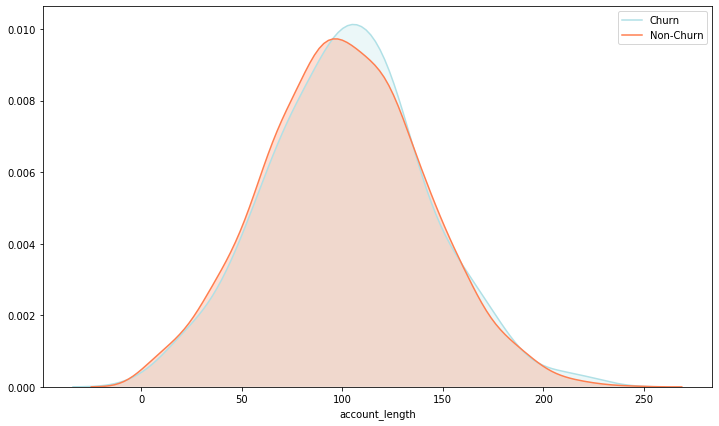

In [55]:
kdeplot_features(df, 'account_length', 'powderblue', 'coral')

#### Distribution of Customer Service Call

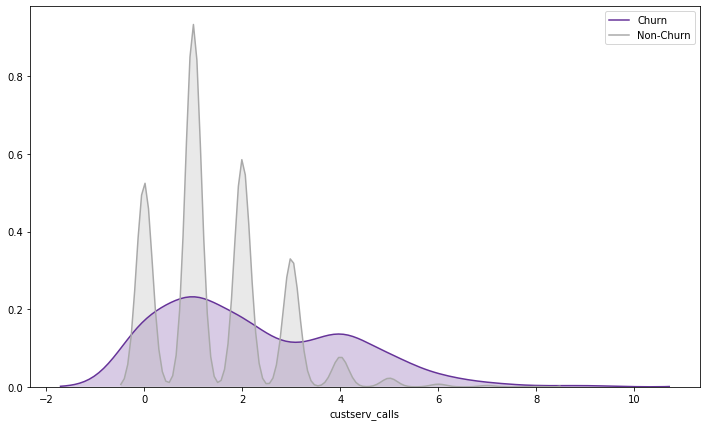

In [56]:
kdeplot_features(df, 'custserv_calls', 'rebeccapurple', 'darkgray')

There is not much difference in account_length between churners and non-churners. But there is a difference in customer service calls between them. Let's investigate this further

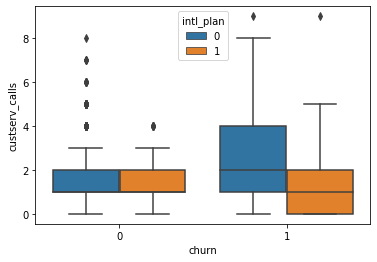

In [38]:
sns.boxplot(x='churn', y = 'custserv_calls', hue = 'intl_plan', data = df)

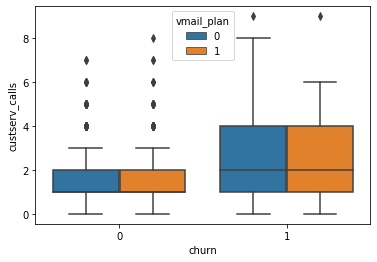

In [39]:
sns.boxplot(x='churn', y = 'custserv_calls', hue = 'vmail_plan', data = df)

#### Distribution of Voice Mail Message

Text(0.5, 0, 'vmail_message')

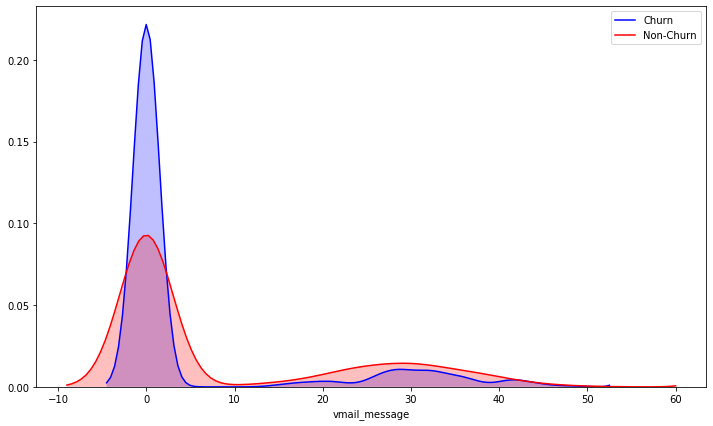

In [62]:
fig, ax = plt.subplots(figsize = (12,7))
ax.grid(False)
sns.kdeplot(df.loc[df['churn'] == 1, 'vmail_message'], color = 'blue', label = 'Churn', shade=True, bw=1.5)
sns.kdeplot(df.loc[df['churn'] == 0,'vmail_message'], color = 'red', label = 'Non-Churn', shade = True, bw='scott')
plt.legend()
plt.xlabel('vmail_message')

#### Distribution of day_mins

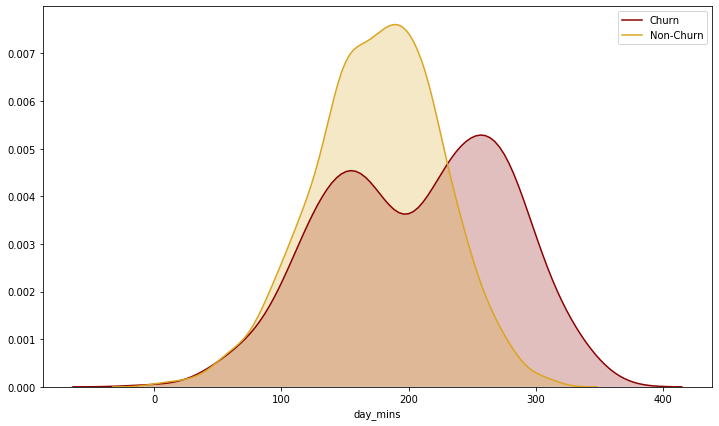

In [63]:
kdeplot_features(df, 'day_mins', 'darkred', 'goldenrod')

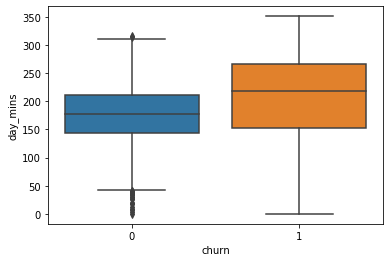

In [64]:
sns.boxplot(x = 'churn', y = 'day_mins', data = df)

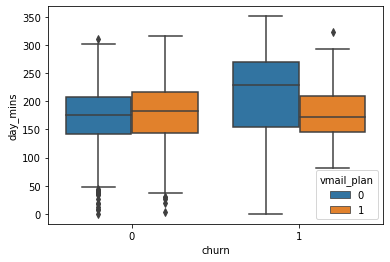

In [65]:
sns.boxplot(x = 'churn', y = 'day_mins', data = df, hue = 'vmail_plan')

Churners without vmail plan use more minutes during the day

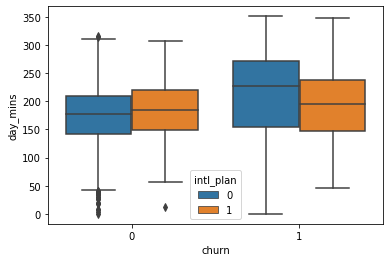

In [66]:
sns.boxplot(x = 'churn', y = 'day_mins', data = df, hue = 'intl_plan')

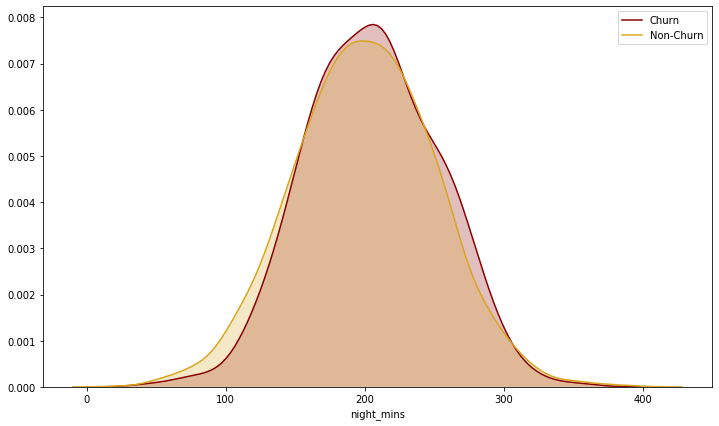

In [67]:
kdeplot_features(df, 'night_mins', 'darkred', 'goldenrod')

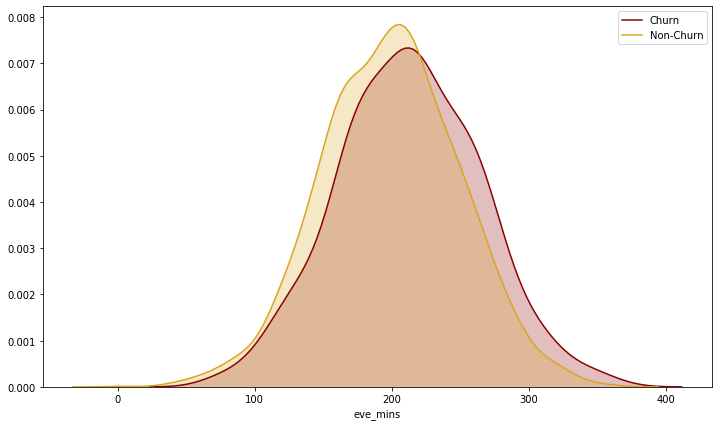

In [68]:
kdeplot_features(df, 'eve_mins', 'darkred', 'goldenrod')

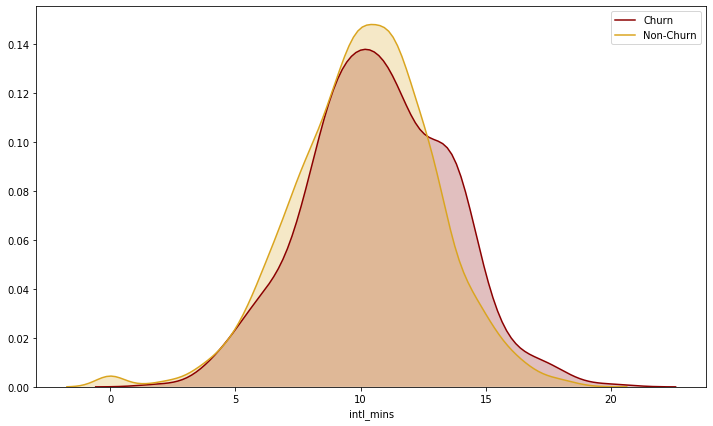

In [69]:
kdeplot_features(df, 'intl_mins', 'darkred', 'goldenrod')

## --- Data Pre-processing ---

### Applying get_dummies to 'state'

In [70]:
states = pd.get_dummies(df['state'], prefix = 'state')

In [71]:
df.drop('state', axis = 1, inplace = True)

In [72]:
df = pd.concat([df, states], axis = 1)

### Dropping Unnessecary Features

In [73]:
df = df.drop(['area_code', 'phone'], axis = 1)

In [74]:
df.columns

Index(['account_length', 'vmail_message', 'day_mins', 'eve_mins', 'night_mins',
       'intl_mins', 'custserv_calls', 'churn', 'intl_plan', 'vmail_plan',
       'day_calls', 'day_charge', 'eve_calls', 'eve_charge', 'night_calls',
       'night_charge', 'intl_calls', 'intl_charge', 'state_AK', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY'],
      dtype='object')

## Features Engineering 

In [75]:
#Create Average Night Calls by dividing night_mins by night_calls
df['avg_night_call'] = df['night_mins']/df['night_calls']
#fill na with 0(it return na when  the denominatir is 0)

In [76]:
df['avg_day_call'] = df['day_mins']/df['day_calls']

In [77]:
df['avg_eve_calls'] = df['eve_mins']/df['eve_calls']

In [78]:
df['avg_intl_calls'] = df['intl_mins']/df['intl_calls']

In [79]:
df = df.fillna(0)

### --- Class Imbalanced ---

In [80]:
df['churn'].value_counts(0)

0    2850
1     483
Name: churn, dtype: int64

Text(0, 0.5, 'Frequency')

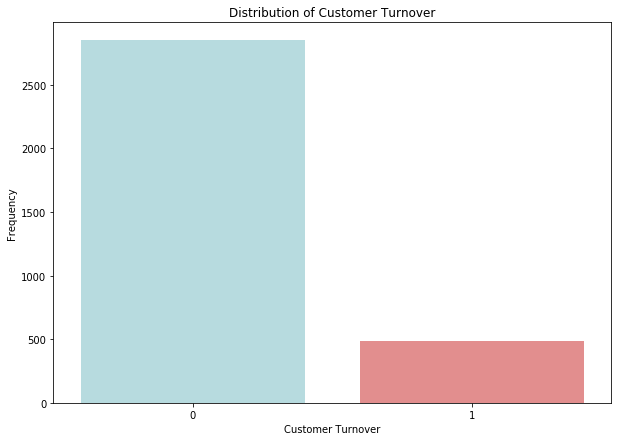

In [81]:
fig = plt.figure(figsize=(10,7))
turnover = df['churn'].value_counts()
sns.barplot(y=turnover.values, x=turnover.index, palette= ['powderblue', 'lightcoral'])
plt.title('Distribution of Customer Turnover')
plt.xlabel('Customer Turnover')
plt.ylabel('Frequency')

The following techniques will be applied to treat the imbalanced class:
- Oversampling
- Undersampling

### Train-Test-Split

In [82]:
y = df.pop('churn')
X = df

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12, stratify = y)

In [84]:
#upsampling minority class
X_train_up, y_train_up = resample(X_train[y_train ==1], y_train[y_train ==1], replace = True, 
                                  n_samples = X_train[y_train==0].shape[0], random_state = 10)
X_train_up = np.concatenate((X_train[y_train == 0], X_train_up))
y_train_up = np.concatenate((y_train[y_train == 0], y_train_up))

In [85]:
#downsamppling majority class
X_train_down, y_train_down = resample(X_train[y_train == 0], y_train[y_train == 0], replace = True,
                                     n_samples = X_train[y_train == 1].shape[0], random_state = 10)
X_train_down = np.concatenate((X_train[y_train == 1], X_train_down))
y_train_down = np.concatenate((y_train[y_train == 1], y_train_down))

In [86]:
print('Original Shape \n X_train: {}, y_train: {}'.format(X_train.shape, y_train.shape))
print('Upsample Shape \n X_train_up: {}, y_train_up: {}'.format(X_train_up.shape, y_train_up.shape))
print('Downsample Shape \n X_train_down: {}, y_train_down: {}'.format(X_train_down.shape, y_train_down.shape))

Original Shape 
 X_train: (2666, 72), y_train: (2666,)
Upsample Shape 
 X_train_up: (4560, 72), y_train_up: (4560,)
Downsample Shape 
 X_train_down: (772, 72), y_train_down: (772,)


### Sampling Techniques Selection

#### Applying 5-Fold Cross Validation for Logistic Regression

Objective: Train Logistic Regression on Original, Upsampled and Downsampled data to see which one produces the best Result

In [87]:
methods_data = {'Original': (X_train, y_train), 
              'Upsampled': (X_train_up, y_train_up), 'Downsampled': (X_train_down, y_train_down)}
for method in methods_data.keys():
    lr_result = cross_val_score(LogisticRegression(max_iter=100000, solver='sag'), methods_data[method][0], methods_data[method][1], scoring = 'f1', cv=5)
    print('The best f1 score for {} data'.format(method))
    print(lr_result.mean())
#Using class_weight parameter
class_weight_result = cross_val_score(LogisticRegression(class_weight='balanced', max_iter=100000, solver='sag'), X_train, y_train, cv = 5, scoring ='f1')
print('The best f1 score for using class_weight parameter: \n{}'.format(class_weight_result.mean()))

The best f1 score for Original data
0.22776901843635938
The best f1 score for Upsampled data
0.7610317830598131
The best f1 score for Downsampled data
0.7407791957532854
The best f1 score for using class_weight parameter: 
0.4481368696715543


## --- Model Development ---

### Logistic Regression

In [88]:
lr = LogisticRegression(solver='sag', max_iter= 10000)
lr.fit(X_train_up, y_train_up)
print('\n-- Logistic Regression Model --')
lr_auc = roc_auc_score(y_test, lr.predict(X_test))
print('\n AUC : %2.2f' % lr_auc)
print(classification_report(y_test, lr.predict(X_test)))


-- Logistic Regression Model --

 AUC : 0.79
              precision    recall  f1-score   support

           0       0.96      0.74      0.83       570
           1       0.35      0.84      0.49        97

    accuracy                           0.75       667
   macro avg       0.66      0.79      0.66       667
weighted avg       0.87      0.75      0.79       667



### Random Forest Classifier

#### Applying 5-Fold Cross Validation for Random Forest Classifier

In [89]:
rf_result = cross_val_score(RandomForestClassifier(), X_train_up, y_train_up, cv = 5, scoring='f1')
print('Random Forest f1 score: {}'.format(rf_result.mean()))

Random Forest f1 score: 0.9910776505313755


In [90]:
rf = RandomForestClassifier()
rf.fit(X_train_up, y_train_up)
print('\n-- Random Forest Classifier Model --')
rf_auc = roc_auc_score(y_test, rf.predict(X_test))
print('\n AUC : %2.2f' % rf_auc)
print(classification_report(y_test, rf.predict(X_test)))


-- Random Forest Classifier Model --

 AUC : 0.80
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       570
           1       0.78      0.63      0.70        97

    accuracy                           0.92       667
   macro avg       0.86      0.80      0.83       667
weighted avg       0.92      0.92      0.92       667



In [91]:
confusion_matrix(y_test, rf.predict(X_test))

array([[553,  17],
       [ 36,  61]])

In [92]:
#Scaling features?
X_train_up_scaled = StandardScaler().fit_transform(X_train_up)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [93]:
rf_result_scaled = cross_val_score(RandomForestClassifier(), X_train_up_scaled, y_train_up, cv = 5, scoring='f1')
print('Random Forest f1 score: {}'.format(rf_result.mean()))

Random Forest f1 score: 0.9910776505313755


In [94]:
rf = RandomForestClassifier()
rf.fit(X_train_up_scaled, y_train_up)
print('\n-- Random Forest Classifier Model --')
rf_auc_scaled = roc_auc_score(y_test, rf.predict(X_test_scaled))
print('\n AUC : %2.2f' % rf_auc_scaled)
print(classification_report(y_test, rf.predict(X_test_scaled)))


-- Random Forest Classifier Model --

 AUC : 0.83
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       570
           1       0.70      0.71      0.71        97

    accuracy                           0.91       667
   macro avg       0.83      0.83      0.83       667
weighted avg       0.91      0.91      0.91       667



### Gradient Boosting Classifier

#### Applying 5-Fold Cross Validation for Gradient Boosting Classifier

In [95]:
gb_result = cross_val_score(GradientBoostingClassifier(), X_train_up, y_train_up, cv = 5, scoring='f1')
print('Gradient Boosting Classifier f1 score: {}'.format(gb_result.mean()))

Gradient Boosting Classifier f1 score: 0.9171755660133558


In [96]:
gb = GradientBoostingClassifier()
gb.fit(X_train_up, y_train_up)
print('\n-- Gradient Boosting Classifier Model --')
gb_auc = roc_auc_score(y_test, gb.predict(X_test))
print('\n AUC : %2.2f' % gb_auc)
print(classification_report(y_test, gb.predict(X_test)))


-- Gradient Boosting Classifier Model --

 AUC : 0.87
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       570
           1       0.62      0.82      0.70        97

    accuracy                           0.90       667
   macro avg       0.79      0.87      0.82       667
weighted avg       0.92      0.90      0.91       667



In [97]:
gb_result_scaled = cross_val_score(GradientBoostingClassifier(), X_train_up_scaled, y_train_up, cv = 5, scoring='f1')
print('Gradient Boosting Classifier f1 score: {}'.format(gb_result_scaled.mean()))

Gradient Boosting Classifier f1 score: 0.9173834610012788


In [98]:
model = gb.fit(X_train_up_scaled, y_train_up)
print('\n-- Gradient Boosting Classifier Model --')
gb_auc_scaled = roc_auc_score(y_test, gb.predict(X_test_scaled))
print('\n AUC : %2.2f' % gb_auc_scaled)
print(classification_report(y_test, gb.predict(X_test_scaled)))


-- Gradient Boosting Classifier Model --

 AUC : 0.88
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       570
           1       0.56      0.87      0.68        97

    accuracy                           0.88       667
   macro avg       0.77      0.88      0.81       667
weighted avg       0.92      0.88      0.89       667



## --- Model Evaluation ---

### ROC Graph

In [99]:
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
scaled_rf_fpr, scaled_rf_tpr, scaled_rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:,1])
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
scaled_gb_fpr, scaled_gb_tpr, scaled_gb_thresholds = roc_curve(y_test, gb.predict_proba(X_test_scaled)[:,1])

Text(0.5, 1.0, 'ROC GRAPH')

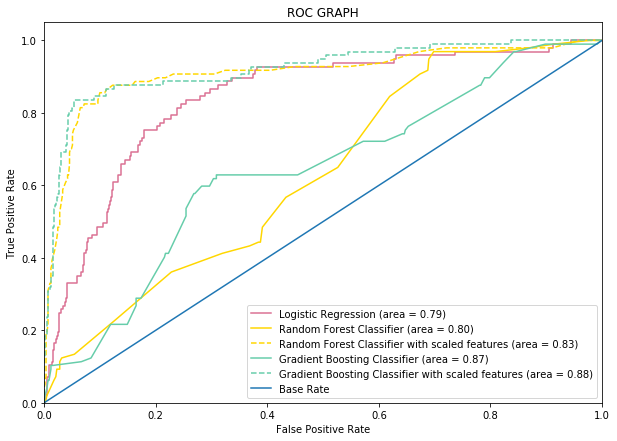

In [100]:
plt.figure(figsize=(10,7))
#Logistic Regression
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f)' % lr_auc, color = 'palevioletred')
#Random Forest Classifier
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_auc, color = 'gold')
#Random Forest Classifier with scaled features
plt.plot(scaled_rf_fpr, scaled_rf_tpr, label='Random Forest Classifier with scaled features (area = %0.2f)' % rf_auc_scaled, color = 'gold', linestyle = '--')
#Gradient Boosting Classifier
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gb_auc, color = 'mediumaquamarine')
#Gradient Boosting Classifier with scaled features
plt.plot(scaled_gb_fpr, scaled_gb_tpr, label='Gradient Boosting Classifier with scaled features (area = %0.2f)' % gb_auc_scaled, color = 'mediumaquamarine', linestyle = '--')
#Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.title('ROC GRAPH')

## --- Best Model Selection ---

In [101]:
gb = GradientBoostingClassifier(max_depth=4, max_features=19, random_state=40)
gb.fit(X_train_up_scaled, y_train_up)
print('\n-- Gradient Boosting Classifier Model --')
gb_auc_scaled = roc_auc_score(y_test, gb.predict(X_test_scaled))
print('\n AUC : %2.2f' % gb_auc_scaled)
print(classification_report(y_test, gb.predict(X_test_scaled)))


-- Gradient Boosting Classifier Model --

 AUC : 0.89
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       570
           1       0.65      0.87      0.74        97

    accuracy                           0.91       667
   macro avg       0.81      0.89      0.84       667
weighted avg       0.93      0.91      0.92       667



Based on the recall rate from our model tuning, A gradient Boosting model with a max_depth_size of 4 and a max_features of 19 is choosen. We obtained a result with a recall rate of class 1 is 87%. our goal is to predict  as much churners as possible and we are willinng to compensate for the price of higher false positive rate. As company would rather to make effort to retain churned customers (even though they are not) than loosing customers which they failed to classify (due to the false negative rate) 

## --- Features Importance ---

In [108]:
def summarise_feature_importance(feature_names, model, summarise_cols, col_name):
    feature_dict = dict(zip(feature_names, model.feature_importances_))
    key_list = []
    value_list = []
    for key, value in feature_dict.items():
        if key not in summarise_cols:
            key_list.append(key)
            value_list.append(value)
            sum_col = sum(value_list)
    feature_dict[col_name] = sum_col
    for k in key_list:
        feature_dict.pop(k)
    results = pd.Series(feature_dict, feature_dict.keys())
    results.sort_values(inplace=True)
    results.plot(kind = 'barh', figsize = (12,7))

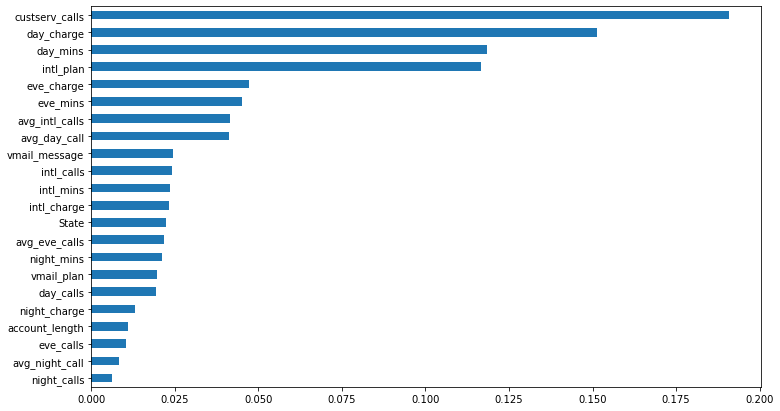

In [109]:
cat_var = ['account_length', 'vmail_message', 'day_mins', 'eve_mins', 'night_mins',
       'intl_mins', 'custserv_calls', 'intl_plan', 'vmail_plan', 'day_calls',
       'day_charge', 'eve_calls', 'eve_charge', 'night_calls', 'night_charge',
       'intl_calls', 'intl_charge', 'avg_night_call', 'avg_day_call', 'avg_eve_calls', 'avg_intl_calls']
summarise_feature_importance(feature_names=X_train.columns, model = gb, summarise_cols=cat_var, col_name='State')

## --- Conclusion ---

There are many reasons why customers are unhappy. they may be upset with the poor signal quality, or slow 4G speed or anything related to customer serivce. Some customers may just leave their fuss behind and keep on using the service. Some may not be happy and decide to switch to another provider. Therefore, customer satisfaction survey is recommended. The goal is to gain insight into the churning motivation among the group that has high churning rate.

To be more detailed, establishing a team who is focusing on taking care of customers and pays close attetion to the group of high churning rate. Survey should include information about what make customers unahappy and what features they would like to add into their cuurent plans. Customers may switch to the competitors' service anytime. Therefore,  early detecting their churn possibility is a very essential task for company. The next step is  translating survey's repsponds into useful ingisht and clustering them into different groups with specific traits to customise services tailoring their needs. For exmaple, customers who have high need of international calls, are unhappy about being charged to much for every minute they exceed the call limitation. Customer servie team will reach out to this group and offer a plan of extra minutes for internation calls. 